For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
np.random.seed(123)

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [70]:
trials = 10_000

In [71]:
cars_waiting_sim = np.random.poisson(2, trials)

In [5]:
λ = 2
cars_waiting = stats.poisson(λ)

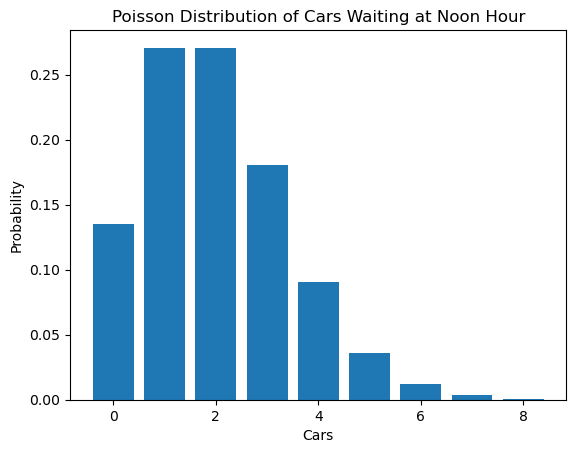

In [44]:
domain = np.arange(0, 9)
cars_range = [cars_waiting.pmf(n) for n in domain]
plt.bar(domain, cars_range)
plt.title('Poisson Distribution of Cars Waiting at Noon Hour')
plt.xlabel('Cars')
plt.ylabel('Probability')
plt.show()

What is the probability that no cars drive up in the noon hour?

In [154]:
(cars_waiting_sim == 0).mean()

0.1357

In [156]:
stats.poisson(2).pmf(0)

0.1353352832366127

What is the probability that 3 or more cars come through the drive through?

In [157]:
(cars_waiting_sim >= 3).mean()

0.322

In [158]:
stats.poisson(2).sf(2)

0.32332358381693654

How likely is it that the drive through gets at least 1 car?

In [159]:
(cars_waiting_sim >=1).mean()

0.8643

In [160]:
stats.poisson(2).sf(0)

0.8646647167633873

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [13]:
mean_value = 3.0
standard_deviation = 0.3

In [14]:
grades = stats.norm(mean_value, standard_deviation)

What grade point average is required to be in the top 5% of the graduating class?

In [75]:
trials = 10_000

In [76]:
position = 95
gpa = np.random.normal(mean_value, standard_deviation, trials)
np.percentile(gpa,position)

3.4799708718770392

In [31]:
grades.isf(0.05)

3.4934560880854417

In [161]:
grades.ppf(0.95)

3.4934560880854417

What GPA constitutes the bottom 15% of the class?

In [163]:
position = 15
gpa = np.random.normal(mean_value, standard_deviation, trials)
np.percentile(gpa,position)

2.6869630162461418

In [23]:
grades.ppf(0.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship? Yes

In [164]:
position = .30
gpa = np.random.normal(mean_value, standard_deviation, trials)
np.percentile(gpa,[position*100 - 10,position*100])

array([2.75193422, 2.84722853])

In [24]:
grades.ppf(0.30)

2.842679846187588

In [26]:
grades.ppf(0.20)

2.7475136299281258

In [185]:
grades.ppf([0.2,0.3])

array([2.74751363, 2.84267985])

If I have a GPA of 3.5, what percentile am I in?

In [80]:
grade = 3.5
gpa = np.random.normal(mean_value, standard_deviation, trials)
(gpa <= 3.5).mean()

0.9544

In [81]:
grades.cdf(3.5)

0.9522096477271853

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [82]:
trials = 10_000
avg_click = .02
visitors = 4326
clicks = 97

data = np.random.choice(["click","no click"], (trials,visitors), p=[.02,.98])
((data == "click").sum(axis=1) >= 97).mean()

0.1377

In [83]:
click_throughs = stats.binom(visitors, avg_click)

In [173]:
click_throughs.sf(96)

0.13975823631416448

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [186]:
questions = 60
prob_correct = 1/101

In [187]:
data = np.random.choice(["correct","not correct"],(trials,questions),p=[prob_correct,1-prob_correct])
((data == "correct").sum(axis=1) >= 1).mean()


0.4517

In [188]:
stats.binom(questions,prob_correct).sf(0)

0.44955038406224

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [53]:
prob_cleaning = .03
cohorts = 3
students_per_cohort = 22
prob_students_break = .9
students_in_breakroom = round(cohorts * students_per_cohort * prob_students_break)
students_in_breakroom

59

How likely is it that the break area gets cleaned up each day?

In [86]:
data = np.random.choice(["clean","no clean"],(trials,students_in_breakroom),p=[.03,.97])
p_day_clean = ((data == "clean").sum(axis=1) >= 1).mean()
p_day_clean

0.8282

In [52]:
prob_clean_day = stats.binom(students_in_breakroom,prob_cleaning).sf(prob_students_break)
prob_clean_day

0.8342199288437352

How likely is it that it goes two days without getting cleaned up?

In [205]:
stats.binom(((students_in_breakroom * 2) + 1), prob_cleaning).pmf(0)

0.026658541032798935

In [211]:
stats.binom((students_in_breakroom * 5), prob_cleaning).pmf(0)

0.00012521651388088851

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [65]:
mean = 15
std = 3
time_person = 2
receive_food = 10
lunch_time = 60

In [94]:
num_people = np.random.normal(mean,std,trials).round()
wait = (num_people + 1) * time_person + receive_food
((lunch_time - wait) >=15).mean()

0.6891

In [195]:
mean_order_time = mean * time_person
std_order_time = std * time_person
#60 - (15 + 10 + 2) = 33
stats.norm(mean_order_time,std_order_time).cdf(33)


0.6914624612740131

In [ ]:
value -> probability
-- pmf: probability at a particular value of random variable (only for discrete distributions!)
-- pdf: probability density at a particular value of random variable (for continuous distributions)
-- cdf: cumulative probablity for less than or equal to value of random variable
-- sf: probability for a random variable greater than certain value
probability -> value
-- ppf: less than or equal to a point
-- isf: greater than a point

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [ ]:
from env import user, password, host

In [109]:
pd.read_sql("show tables", url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [196]:
query = '''
    SELECT * 
    FROM salaries 
    WHERE to_date > NOW()
    '''

In [197]:
df = pd.read_sql(query,url)
df.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [198]:
mean_salary = df.salary.mean()
std_salary = df.salary.std()

In [199]:
data = np.random.normal(mean_salary,std_salary,trials)

In [200]:
salary_distro = stats.norm(mean_salary,std_salary)

What percent of employees earn less than 60,000?

In [201]:
(data < 60000).mean()

0.2438

In [202]:
salary_distro.cdf(60000)

0.24385742480214434

In [203]:
(df.salary < 60000).mean()

0.2705727041028802

What percent of employees earn more than 95,000?

In [140]:
(data > 95000).mean()

0.0933

In [138]:
(df.salary > 95000).mean()

0.1086272092752078

In [139]:
salary_distro.sf(95000)

0.09208819199804058

What percent of employees earn between 65,000 and 80,000?

In [141]:
((data > 65000) & (data < 80000)).mean()

0.33

In [142]:
salary_distro.cdf(80000) - salary_distro.cdf(65000)

0.33506056854466654

In [143]:
((df.salary > 65000) & (df.salary < 80000)).mean()

0.325107028035515

What do the top 5% of employees make?

In [144]:
np.percentile(data,95)

100665.72444298057

In [145]:
salary_distro.isf(.05)

100484.64454102777

In [146]:
np.percentile(df.salary,95)

104225.84999999998

In [147]:
df.salary.quantile(.95)

104225.84999999998